In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression


In [3]:
df=pd.read_csv('Language Detection.csv')

In [4]:
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


In [6]:
df.shape

(10337, 2)

In [7]:
df.isnull().sum()

Text        0
Language    0
dtype: int64

In [8]:
df.duplicated().sum()

66

In [9]:
df[df.duplicated()]

,Text,Language
1141,i'm sorry.,English
1180,oh my god.,English
1196,i'm sorry.,English
1724,എന്നോട് ക്ഷമിക്കൂ.,Malayalam
1767,ഓ എന്റെ ദൈവമേ.,Malayalam
...,...,...
9706,Ach du lieber Gott.,German
9726,Es tut mir Leid.,German
10081,ನನ್ನನ್ನು ಕ್ಷಮಿಸು.,Kannada
10125,ಓ ದೇವರೇ.,Kannada


In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.shape

(10271, 2)

In [13]:
df['Language'].nunique()

17

In [14]:
df['Language'].value_counts()

English       1382
French        1007
Spanish        816
Portugeese     736
Italian        694
Russian        688
Sweedish       673
Malayalam      591
Dutch          542
Arabic         532
Turkish        471
German         465
Tamil          464
Danish         424
Kannada        366
Greek          358
Hindi           62
Name: Language, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'English'),
  Text(1, 0, 'Malayalam'),
  Text(2, 0, 'Hindi'),
  Text(3, 0, 'Tamil'),
  Text(4, 0, 'Portugeese'),
  Text(5, 0, 'French'),
  Text(6, 0, 'Dutch'),
  Text(7, 0, 'Spanish'),
  Text(8, 0, 'Greek'),
  Text(9, 0, 'Russian'),
  Text(10, 0, 'Danish'),
  Text(11, 0, 'Italian'),
  Text(12, 0, 'Turkish'),
  Text(13, 0, 'Sweedish'),
  Text(14, 0, 'Arabic'),
  Text(15, 0, 'German'),
  Text(16, 0, 'Kannada')])

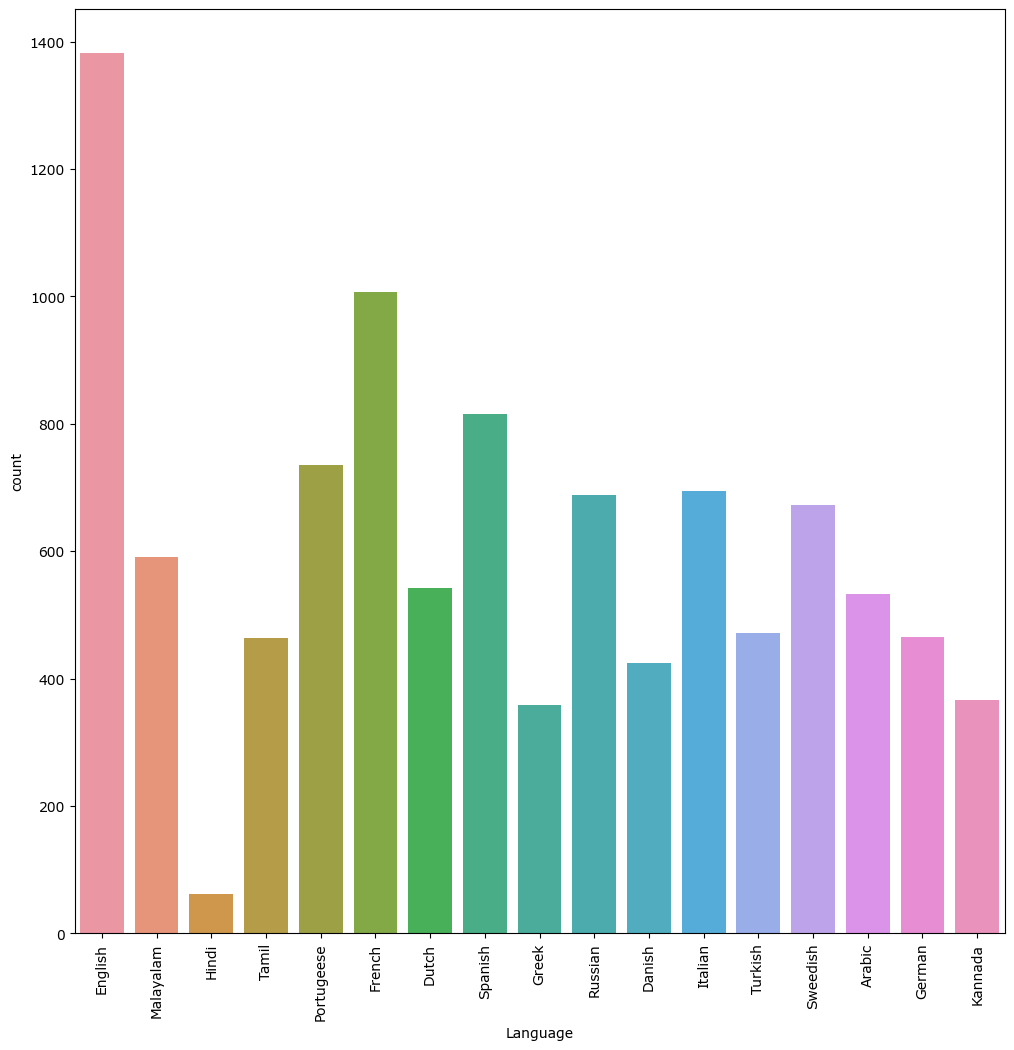

In [15]:
plt.figure(figsize=(12,12))
y=len(df)
sns.countplot(x=df['Language'],data=df)
plt.xticks(rotation=90)

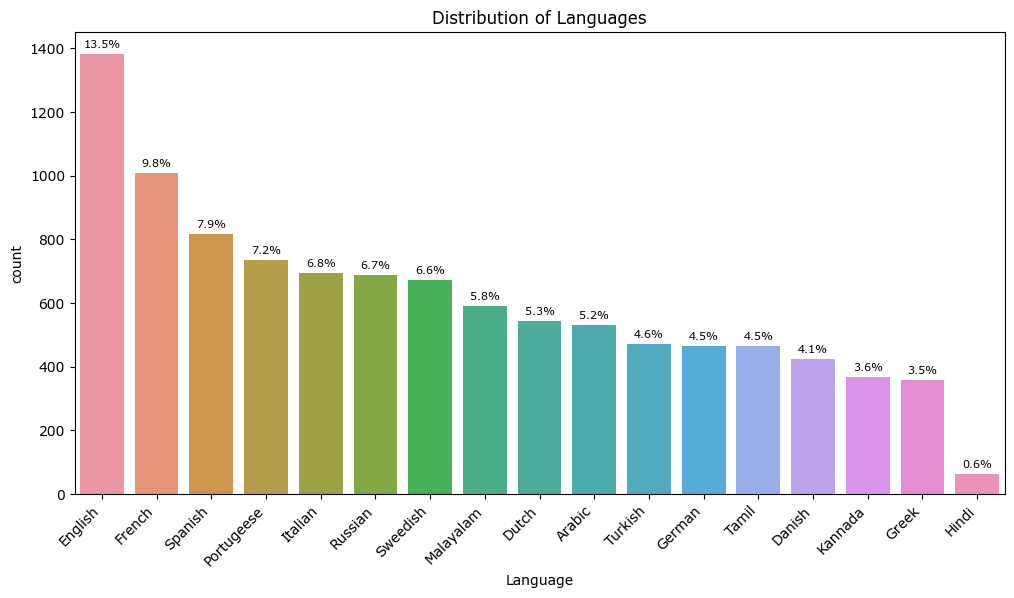

In [16]:
 # Count plot with percentage annotations
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Language', data=df, order=df['Language'].value_counts().index)
plt.title('Distribution of Languages')
plt.xticks(rotation=45, ha='right')
# Add percentage annotations
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 20
    ax.text(x, y, percentage, ha='center', fontsize=8)
plt.show()

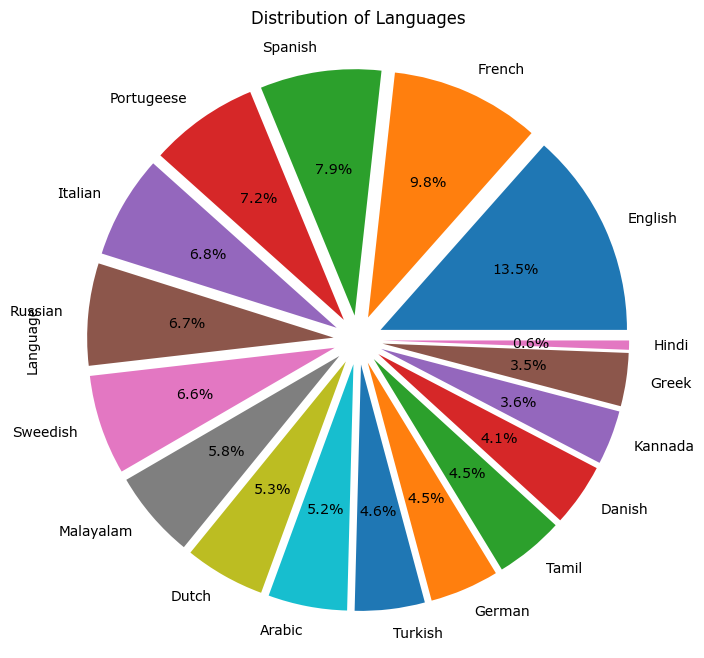

In [17]:
# Pie plot
plt.figure(figsize=(8, 8))
df['Language'].value_counts().plot.pie(autopct='%1.1f%%', explode=[0.1] * len(df['Language'].unique()))
plt.title('Distribution of Languages')
plt.show()

In [18]:
data=df.copy()

In [19]:
data['Cleaned_Text']=""
data

,Text,Language,Cleaned_Text
0,"Nature, in the broadest sense, is the natural...",English,
1,"""Nature"" can refer to the phenomena of the phy...",English,
2,"The study of nature is a large, if not the onl...",English,
3,"Although humans are part of nature, human acti...",English,
4,[1] The word nature is borrowed from the Old F...,English,
...,...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada,
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada,
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada,
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada,


In [20]:
import re
def clean_function(Text):
    # removing the symbols and numbers
    Text = re.sub(r'[\([{})\]!@#$,"%^*?:;~`0-9]', ' ', Text)
    # converting the text to lower case
    Text = Text.lower()
    Text = re.sub('http\S+\s*', ' ', Text) # remove URLs
    Text = re.sub('RT|cc', ' ', Text) # remove RT and cc
    Text = re.sub('#\S+', '', Text) # remove hashtags
    Text = re.sub('@\S+', ' ', Text) # remove mentions
    Text = re.sub('\s+', ' ', Text) # remove extra whitespace
    return Text

In [21]:
data['Cleaned_Text']=data['Text'].apply(lambda x: clean_function(x))
data

,Text,Language,Cleaned_Text
0,"Nature, in the broadest sense, is the natural...",English,nature in the broadest sense is the natural p...
1,"""Nature"" can refer to the phenomena of the phy...",English,nature can refer to the phenomena of the phys...
2,"The study of nature is a large, if not the onl...",English,the study of nature is a large if not the only...
3,"Although humans are part of nature, human acti...",English,although humans are part of nature human activ...
4,[1] The word nature is borrowed from the Old F...,English,the word nature is borrowed from the old fren...
...,...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...


In [22]:
X=data.iloc[:,-1]
y=data.iloc[:,1]

In [23]:
X

0         nature in the broadest sense is the natural p...
1         nature can refer to the phenomena of the phys...
2        the study of nature is a large if not the only...
3        although humans are part of nature human activ...
4         the word nature is borrowed from the old fren...
                               ...                        
10332    ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10333    ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10334    ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...
10335    ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...
10336    ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...
Name: Cleaned_Text, Length: 10271, dtype: object

In [24]:
y

0        English
1        English
2        English
3        English
4        English
          ...   
10332    Kannada
10333    Kannada
10334    Kannada
10335    Kannada
10336    Kannada
Name: Language, Length: 10271, dtype: object

In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [28]:
# Text Vectorization
tfidf=TfidfVectorizer(max_features=5000)
X_train_tfidf=tfidf.fit_transform(X_train)
X_test_tfidf=tfidf.transform(X_test)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


In [30]:
# Model Training
models={
    'Logistic Regression':LogisticRegression(),
    'K-Nearest Neighbors':KNeighborsClassifier(),
    'Random Forest':RandomForestClassifier(),
    'Naive Bayes': MultinomialNB()   
    
}



Model: Logistic Regression
Accuracy: 0.9557177615571776
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       121
           1       0.95      0.94      0.95        85
           2       0.99      0.93      0.96       108
           3       0.97      0.99      0.98       290
           4       1.00      0.95      0.97       210
           5       1.00      0.95      0.98        86
           6       1.00      0.95      0.98        65
           7       1.00      0.75      0.86         8
           8       0.98      0.93      0.96       130
           9       1.00      0.96      0.98        70
          10       1.00      0.99      1.00       122
          11       0.97      0.96      0.96       139
          12       0.66      1.00      0.80       119
          13       0.96      0.96      0.96       160
          14       0.98      0.95      0.96       150
          15       1.00      0.99      0.99        86
  

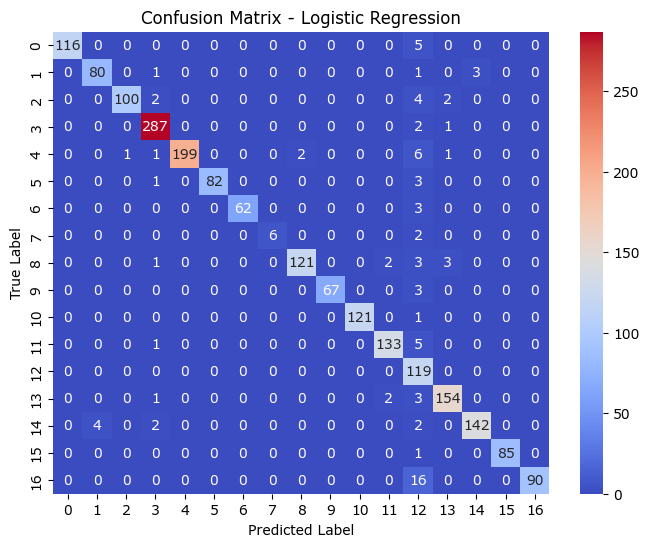

C:\Users\ganes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Model: K-Nearest Neighbors
Accuracy: 0.39854014598540144
Classification Report:
              precision    recall  f1-score   support

           0       0.19      0.68      0.29       121
           1       0.27      0.47      0.34        85
           2       0.42      0.52      0.46       108
           3       0.50      0.19      0.27       290
           4       0.69      0.26      0.37       210
           5       0.54      0.50      0.52        86
           6       0.49      0.66      0.57        65
           7       0.67      0.25      0.36         8
           8       0.65      0.25      0.36       130
           9       0.49      0.59      0.53        70
          10       0.87      0.45      0.59       122
          11       0.60      0.17      0.27       139
          12       0.28      0.68      0.40       119
          13       0.51      0.22      0.31       160
          14       0.77      0.27      0.40       150
          15       0.90      0.74      0.82        86
 

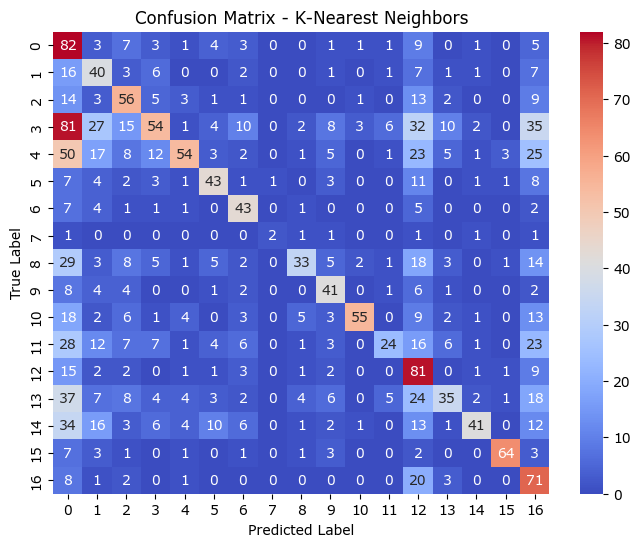

Model: Random Forest
Accuracy: 0.9420924574209246
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       121
           1       0.94      0.93      0.93        85
           2       0.97      0.91      0.94       108
           3       0.97      0.97      0.97       290
           4       0.98      0.91      0.94       210
           5       0.98      0.94      0.96        86
           6       1.00      0.95      0.98        65
           7       1.00      0.88      0.93         8
           8       0.97      0.92      0.94       130
           9       1.00      0.96      0.98        70
          10       1.00      0.96      0.98       122
          11       0.96      0.91      0.94       139
          12       1.00      0.95      0.97       119
          13       0.90      0.93      0.91       160
          14       0.96      0.94      0.95       150
          15       1.00      0.98      0.99        86
        

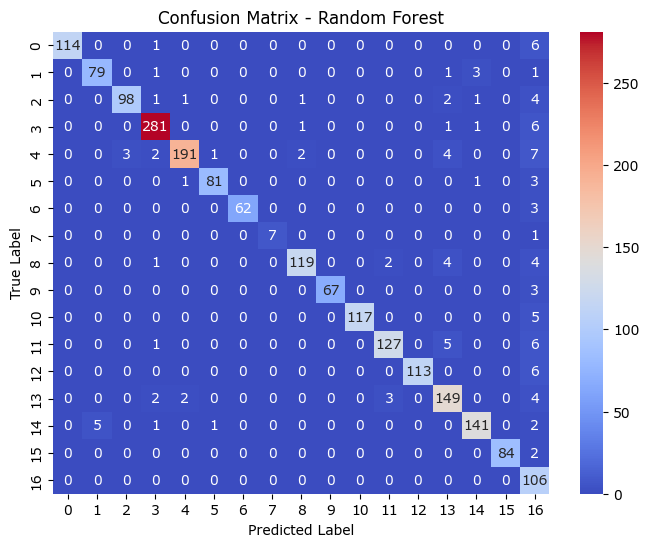

Model: Naive Bayes
Accuracy: 0.9600973236009732
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       121
           1       0.99      0.94      0.96        85
           2       1.00      0.94      0.97       108
           3       0.81      1.00      0.90       290
           4       0.99      0.98      0.98       210
           5       1.00      0.98      0.99        86
           6       1.00      0.95      0.98        65
           7       1.00      0.62      0.77         8
           8       1.00      0.95      0.97       130
           9       1.00      0.96      0.98        70
          10       1.00      0.99      1.00       122
          11       0.98      0.96      0.97       139
          12       1.00      0.96      0.98       119
          13       0.97      0.96      0.97       160
          14       0.97      0.97      0.97       150
          15       1.00      0.99      0.99        86
          

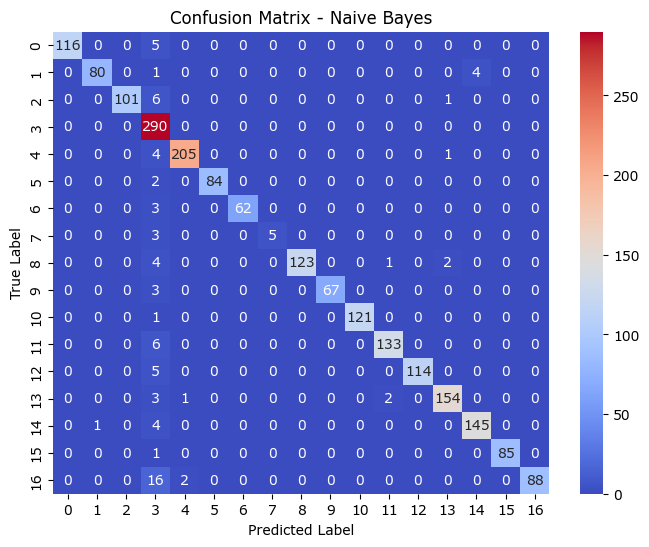

In [33]:
for model_name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
# Model Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix_result = confusion_matrix(y_test, y_pred)
    classification_report_str = classification_report(y_test, y_pred)

    print(f'Model: {model_name}')
    print(f'Accuracy: {accuracy}')
    print(f'Classification Report:\n{classification_report_str}')
   

# Plot Confusion Matrix Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_result, annot=True, fmt='d', cmap='coolwarm')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    

In [38]:
def predict(text):
    lang = model.predict(tfidf.transform([text]))
    language = le.inverse_transform(lang)[0]
    print('The Language is in', language)


In [40]:
# English
predict("LANGUAGE DETECTION MODEL CHECK")
# French
predict("VÉRIFICATION DU MODÈLE DE DÉTECTION DE LA LANGUE")
# Tamil
predict("நம்பகமான செநுவு க்கான அறநெறி வழிகாட்டுதல்கள் ")
# Spanish
predict("VERIFICACIÓN DEL MODELO DE")

The Language is in English
The Language is in French
The Language is in Tamil
The Language is in Spanish
